In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 10 digits) and softmax activation
])

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 638us/step - loss: 0.2586 - accuracy: 0.9271
Epoch 2/5
1875/1875 [==============================] - 1s 642us/step - loss: 0.1157 - accuracy: 0.9658
Epoch 3/5
1875/1875 [==============================] - 1s 646us/step - loss: 0.0793 - accuracy: 0.9759
Epoch 4/5
1875/1875 [==============================] - 1s 610us/step - loss: 0.0587 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 1s 614us/step - loss: 0.0468 - accuracy: 0.9856


In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 0s - loss: 0.0798 - accuracy: 0.9753 - 175ms/epoch - 558us/step

Test accuracy: 0.9753000140190125


In [7]:
predictions = model.predict(x_test[:5])
print(predictions)

1/1 [==============================] - 0s 44ms/step
[[5.0871087e-08 1.8974470e-08 1.6067155e-05 6.4685178e-04 6.8146883e-10
  4.6248712e-07 1.6649739e-13 9.9928778e-01 5.5408213e-06 4.3344593e-05]
 [1.7440503e-07 3.4022582e-05 9.9993932e-01 1.3176339e-05 3.9863508e-14
  1.8484459e-07 1.2111323e-07 3.3109635e-15 1.3045131e-05 2.4263412e-13]
 [6.9532638e-07 9.9729520e-01 7.4866216e-04 3.2596986e-04 2.7829109e-04
  2.9610246e-05 9.1991918e-05 4.6157182e-04 7.5716898e-04 1.0844130e-05]
 [9.9996173e-01 6.6158496e-09 5.9020049e-06 6.9769463e-08 1.0191357e-08
  4.9990735e-08 3.1596868e-05 7.1081081e-07 2.4589328e-10 2.1419579e-08]
 [8.8633982e-07 4.2447450e-08 3.8483745e-06 2.2907724e-08 9.9608564e-01
  1.2871368e-07 6.2314473e-07 1.8233028e-05 2.1294625e-05 3.8694711e-03]]


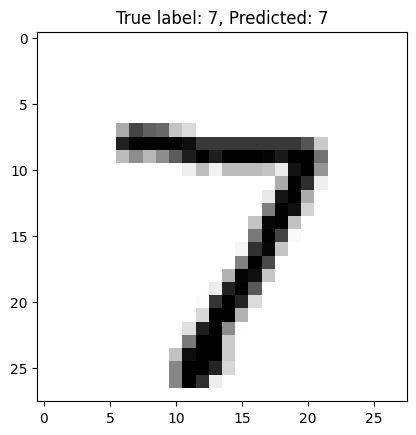

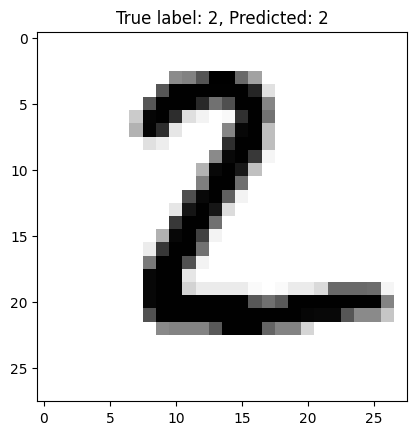

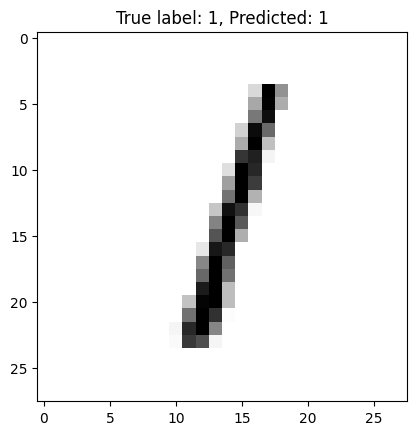

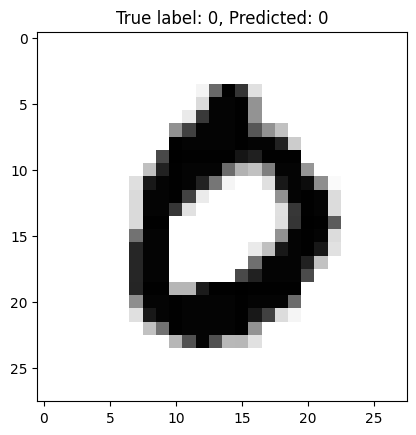

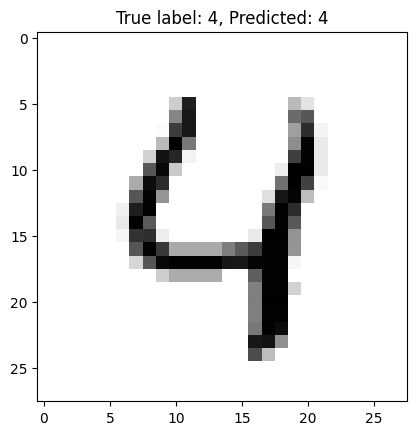

In [8]:
for i in range(5):
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(f"True label: {y_test[i]}, Predicted: {np.argmax(predictions[i])}")
    plt.show()
